# Importing all the necessary libraries and reading the data

In [15]:
import numpy as  np
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [16]:
data=pd.read_csv(r'C:\Users\Akshay Deshmukh\Desktop\Data Science\Datasets\Telecom\telecom_users.csv')

In [17]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Exploratory data analysis

In [18]:
data.shape

(5986, 22)

In [19]:
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [21]:
data.TotalCharges=pd.to_numeric(data.TotalCharges, errors="coerce")

In [22]:
data['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [23]:
data.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [24]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [25]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2272.226516
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,406.275000
50%,3546.500000,0.000000,29.000000,70.400000,1414.550000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


# Key points from the EDA

1. Data Consists of 22 independent variables including the target.


2. Through data.info it is observed that there are non-null values present in the dataset.


3. The TotalCharges variable has an object Datatype.


4. After converting the TotalCharges variable into numeric datatype, 10 null values are found and replaces with the mean value as the number of missing values is to low.


5. The dataset is highly biased as we have only 1587 data points for people who have terminated their services out the 5986 datapoints in the data-set.


# Data Visualization

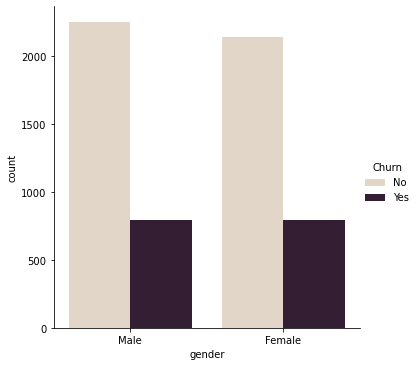

In [26]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=data, hue="Churn")

The churning of the customer does not depend on the gender of the customer.

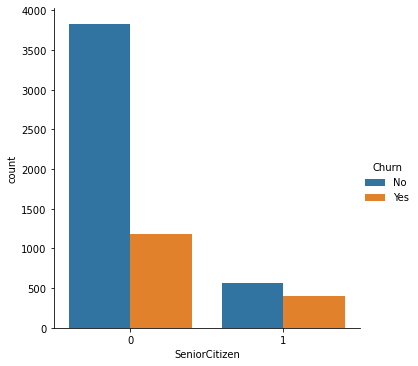

In [27]:
sns.catplot(x="SeniorCitizen", kind="count", data=data, hue="Churn")

Senior citizens tend to churn more  than the younger people.

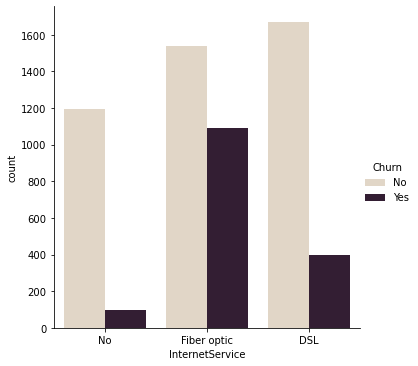

In [28]:
sns.catplot(x="InternetService", kind="count", palette="ch:.25", data=data, hue="Churn")

People with fiber optic inter net service connections tend to terminate their services more.

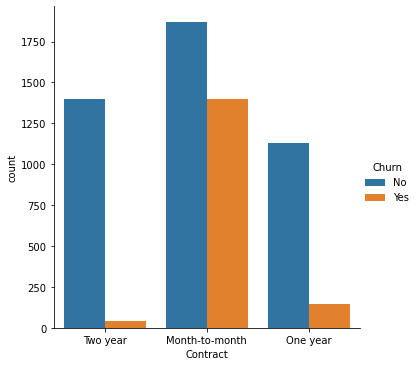

In [29]:
sns.catplot(x="Contract", kind="count", data=data, hue="Churn")

Poeple with yearly plans have less probability of churning than people with monthly plans.

In [30]:
Foptic_data=data[data["InternetService"]=='Fiber optic']

Analysis over people having fiber optic connections as they have the higgest probability of terminating their services.

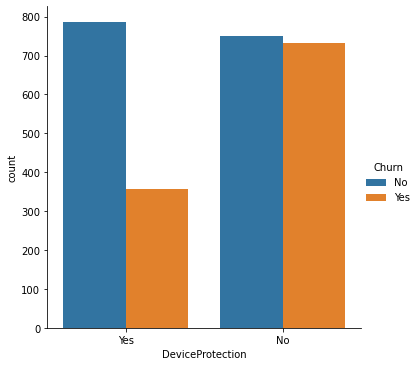

In [31]:
sns.catplot(x="DeviceProtection", kind="count", data=Foptic_data, hue="Churn")

People with fiber optic connections do not tend to take device protection services which must because problems with the devices resulting in people terminating their services.

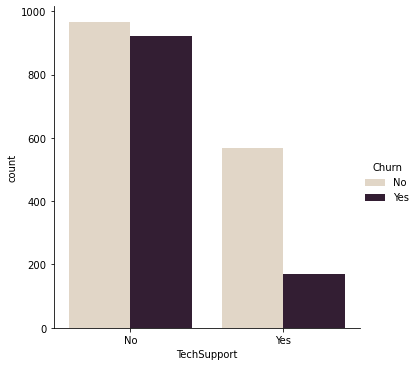

In [32]:
sns.catplot(x="TechSupport", kind="count", palette="ch:.25", data=Foptic_data, hue="Churn")

People with fiber optic services also do not tend to take tech support resulting in device problems and people terminating their services.

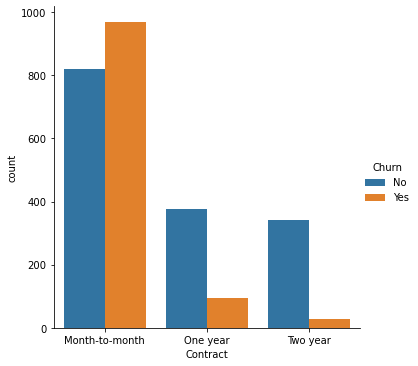

In [33]:
sns.catplot(x="Contract", kind="count", data=Foptic_data, hue="Churn")

Same results have been observed here. People with yearly plans have less probability of terminating their services than people with monthly plans.

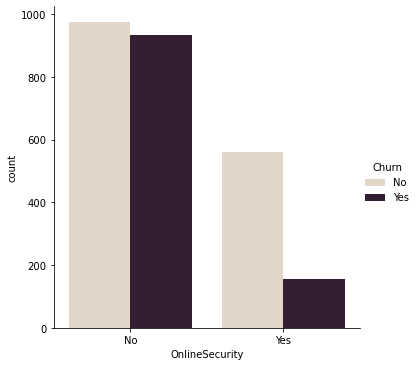

In [34]:
sns.catplot(x="OnlineSecurity", kind="count", palette="ch:.25", data=Foptic_data, hue="Churn")

People with no online security also have a higher  probability of terminating their services. 

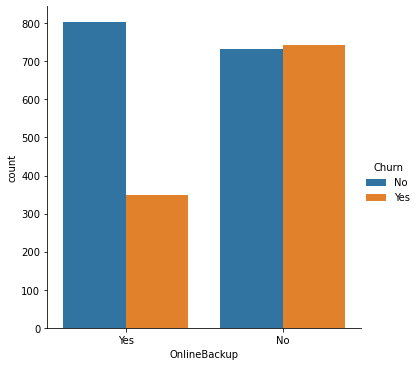

In [35]:
sns.catplot(x="OnlineBackup", kind="count", data=Foptic_data, hue="Churn")

Similar results can be observed with people having no online backup, they have a higger probability of terminating their services.

# Data pre-processing

In [36]:
numeric_data=data[['Unnamed: 0','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

encode_data=data[['gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod',
       'Churn']]

encode_data=encode_data.apply(preprocessing.LabelEncoder().fit_transform)

Lable encoding the object variables.

In [37]:
data=pd.concat([numeric_data, encode_data], axis=1)
data.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1869,0,72,24.10,1734.65,1,1,1,1,2,...,1,1,1,1,1,1,2,0,1,0
1,4528,0,44,88.15,3973.20,0,0,0,1,0,...,0,2,2,0,2,0,0,1,1,0
2,6344,1,38,74.95,2869.85,0,1,0,1,2,...,0,0,0,0,0,0,0,1,0,1
3,6739,0,4,55.90,238.50,1,0,0,1,0,...,0,0,0,0,0,2,0,1,2,0
4,432,0,2,53.45,119.50,1,0,0,1,0,...,2,0,2,0,0,0,0,0,2,0


In [38]:
data=data.drop(['Unnamed: 0','gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'], axis=1)

Dropping the variables with high collinerity. 

In [39]:
X=data.drop(['Churn'],axis=1)
y=data['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
sm = SMOTE(random_state=23, sampling_strategy=0.8)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(len(X_train), len(y_train))

6328 6328


Balancing the data-set using SMOTE analysis so as the model does give bias predictions.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Scaling the all the variables.

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 1234)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[664 219]
 [ 81 234]]


0.7495826377295493

# Conclusion:-


1. The support vector classifier provides us a 74.95% accuracy.


2. Confusion matrix has been used as an accuracy measurement technique for this model.


3. The main purpose of the model is to identify people who might terminate their services which means give minimum number of false positive resuts i.e the model should not give wrong predictions for people who might terminate their services.


4. Out of the 300 positive values we have only 81 false positives, which tells even after the data-set being highly biased, due to SMOTE analysis our model was able to reduce the number of false positives significantly.